In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [2]:
data=pd.read_csv(r"~Sourav Rawat\Downloads\credit_card_approval.csv")

In [3]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,JOB,BEGIN_MONTHS,STATUS,TARGET
0,5065438,F,Y,N,2+ children,270000.000000,Secondary / secondary special,Married,With parents,-13258,-2300,1,0,0,0,Managers,-6,C,0
1,5142753,F,N,N,No children,81000.000000,Secondary / secondary special,Single / not married,House / apartment,-17876,-377,1,1,1,0,Private service staff,-4,0,0
2,5111146,M,Y,Y,No children,270000.000000,Higher education,Married,House / apartment,-19579,-1028,1,0,1,0,Laborers,0,C,0
3,5010310,F,Y,Y,1 children,112500.000000,Secondary / secondary special,Married,House / apartment,-15109,-1956,1,0,0,0,Core staff,-3,0,0
4,5010835,M,Y,Y,2+ children,139500.000000,Secondary / secondary special,Married,House / apartment,-17281,-5578,1,1,0,0,Drivers,-29,0,0


In [4]:
data.shape

(537667, 19)

In [5]:
#data appears to be cleaned. no missing values found!

In [6]:
data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
JOB                    0
BEGIN_MONTHS           0
STATUS                 0
TARGET                 0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537667 entries, 0 to 537666
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   537667 non-null  int64  
 1   CODE_GENDER          537667 non-null  object 
 2   FLAG_OWN_CAR         537667 non-null  object 
 3   FLAG_OWN_REALTY      537667 non-null  object 
 4   CNT_CHILDREN         537667 non-null  object 
 5   AMT_INCOME_TOTAL     537667 non-null  float64
 6   NAME_EDUCATION_TYPE  537667 non-null  object 
 7   NAME_FAMILY_STATUS   537667 non-null  object 
 8   NAME_HOUSING_TYPE    537667 non-null  object 
 9   DAYS_BIRTH           537667 non-null  int64  
 10  DAYS_EMPLOYED        537667 non-null  int64  
 11  FLAG_MOBIL           537667 non-null  int64  
 12  FLAG_WORK_PHONE      537667 non-null  int64  
 13  FLAG_PHONE           537667 non-null  int64  
 14  FLAG_EMAIL           537667 non-null  int64  
 15  JOB              

In [8]:
#we are dropping the features that can cause multicolinearity 
#we did it through countplot and found that within the
#the features the classes were imbalance
#these dropped features make no sense with credit card approval

In [9]:
data.drop(["ID","FLAG_MOBIL","FLAG_WORK_PHONE","FLAG_OWN_CAR","FLAG_OWN_REALTY"],axis=1,inplace=True)

In [10]:
data["TARGET"]=data["TARGET"].astype(object)

In [11]:
num=data.select_dtypes(include=np.number)

In [12]:
#outliers treatment
#based on the datasize we are removing the outliers from the data which can  

#capping the outliers
for i in num:
    q1,q3=np.quantile(data[i],[0.25,0.75])
    iqr=q3-q1
    ul=q3+(1.5*iqr)
    ll=q1-(1.5*iqr)
    data.loc[data[i]>ul,i]=ul
    data.loc[data[i]<ll,i]=ll

In [13]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
upper_lim=q3+(1.5*iqr)

lower_lim=q1-(1.5*iqr)
newdata=data.loc[~((data<lower_lim)|(data>upper_lim)).any(axis=1)]

In [14]:
#we need to plot a pairplot for the newdata and see whats the pattern we are getting
#for best model. # as we know just by the trend of the pairplot with the target we can infer the algoritm
#whether it is  dtree or knn n so on

In [15]:
newdata.shape

(434696, 14)

In [16]:
newdata.skew()


AMT_INCOME_TOTAL    0.621705
DAYS_BIRTH         -0.295329
DAYS_EMPLOYED      -0.889219
FLAG_PHONE          0.909652
FLAG_EMAIL          0.000000
BEGIN_MONTHS       -0.606943
TARGET             16.391783
dtype: float64

In [17]:
#we splitted the numerical and categorical columns seperatly

In [18]:
num=newdata.select_dtypes(include=np.number)
cat=newdata.select_dtypes(exclude=np.number)

In [19]:
#applying robust scaler because of  pressence of outliers.

In [20]:
from sklearn.preprocessing import RobustScaler
rc=RobustScaler()
scaled=pd.DataFrame(rc.fit_transform(num),columns=num.columns)

In [21]:
scaled.head()

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,FLAG_EMAIL,BEGIN_MONTHS
0,1.100000,0.256529,-0.117244,0.000000,0.000000,0.500000
1,-1.000000,-0.636874,0.705605,1.000000,0.000000,0.590909
2,1.100000,-0.966338,0.427043,1.000000,0.000000,0.772727
3,-0.650000,-0.101567,0.029953,0.000000,0.000000,0.636364
4,-0.350000,-0.521764,-1.519897,0.000000,0.000000,-0.545455


# we used feature_engine library to encode the categorical data
#according to this we give the respective weightage to the class considering the target column with each individual class
#formula of woe is 

#log(p(X=xj|Y=1)/p(X=xj|Y=0))
#probability of class when it was defaulter / probability of class when it was non-defaulter


#why is it preffered compared to others
* we got rid of curse of dimensionality
* we gave equal importance to classes
* we considered the classes with target and then gave weightage

In [22]:
category=cat.drop("TARGET",axis=1)
from feature_engine.encoding import WoEEncoder
woe=WoEEncoder()

In [23]:
category.STATUS.unique()
#we ensured to keep deliquent a different lable so we marked them as 1 rest all 0.
#1's are the category of people that has debt due more than a month and we want 
#our model to know these deliquent customers since it is the objective of our case study

array(['C', '0', 'X', '2', '1', '5', '3', '4'], dtype=object)

In [24]:
safe=["0","C","X"]
def convert(string):
    if string in safe:
        return 0
    else:
        return 1

In [25]:
category["STATUS"]=category["STATUS"].apply(convert)

In [26]:
#we are rudcing the classes of each category in order to have similar data point in each class


In [27]:
def child(string):
    if string=="No children":
        return "Nokid"
    else:
        return "withkids"

In [28]:
category["CNT_CHILDREN"]=category["CNT_CHILDREN"].apply(child)

In [29]:
educated=["Academic degree","Higher education","Secondary / secondary special"]
def school(string):
    if string in educated:
        return "educated"
    else:
        return "less_eduacted"
    
    

In [30]:
category["NAME_EDUCATION_TYPE"]=category["NAME_EDUCATION_TYPE"].apply(school)

In [31]:
married=["Married","Civil marriage"]
def marriage(string):
    if string in married:
        return "married"
    else:
        return "single"

In [32]:
category["NAME_FAMILY_STATUS"]=category["NAME_FAMILY_STATUS"].apply(marriage)

In [33]:
def house(string):
    
    if string=="Rented apartment":
        
        
        return "payhousebills"
    else:
        return "dont_paybills"

In [34]:
category["NAME_HOUSING_TYPE"]=category["NAME_HOUSING_TYPE"].apply(house)

In [35]:
cat['TARGET']=cat['TARGET'].astype(int)

In [36]:
good_pay=["Managers","High skill tech staff","Accountants","IT staff"]
normal_pay=["Private service staff","Secretaries","Medicine staff"]

def job(string):
    if string in good_pay:
        return "Goodpay"
    elif string in normal_pay:
        return "Normalpay"
    else:
        return "lesspay"
    

In [37]:
category["JOB"]=category["JOB"].apply(job)

In [38]:
encoded=woe.fit_transform(category,cat.TARGET)

In [39]:
encoded.shape,num.shape

((434696, 7), (434696, 6))

In [40]:
num.head()

,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_PHONE,FLAG_EMAIL,BEGIN_MONTHS
0,270000.000000,-13258,-2300,0,0,-6
1,81000.000000,-17876,-377,1,0,-4
2,270000.000000,-19579,-1028,1,0,0
3,112500.000000,-15109,-1956,0,0,-3
4,139500.000000,-17281,-5578,0,0,-29


In [41]:
category=pd.concat([encoded,cat.TARGET],axis=1)

In [44]:
category["sn"]=np.arange(0,434696)

In [45]:
scaled["sn"]=np.arange(0,434696)

In [46]:
final_data=scaled.merge(category,on="sn",how="inner")

In [47]:
final_data.shape

(434696, 15)

In [48]:
final_data.drop("sn",axis=1,inplace=True)

In [49]:
from sklearn.model_selection import train_test_split
X=final_data.drop("TARGET",axis=1)
y=final_data.TARGET

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=1)

In [51]:
print("shape of xtrain",xtrain.shape)
print("shape of xtest",xtest.shape)

print("shape of ytrain",ytrain.shape)
print("shape of ytest",ytest.shape)

shape of xtrain (304287, 13)
shape of xtest (130409, 13)
shape of ytrain (304287,)
shape of ytest (130409,)


In [52]:
ytrain.value_counts(normalize=True)

0   0.996392
1   0.003608
Name: TARGET, dtype: float64

In [53]:
from sklearn.metrics import recall_score,precision_score,confusion_matrix,f1_score,classification_report,cohen_kappa_score

In [54]:
#base model without balancing


In [55]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [56]:
pred=lr.predict(xtest)
print("****************LOGESTIC REGRESSION ALGORITHM********************************")

print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print("accuracy",accuracy_score(ytest,pred))
print("kappa score",cohen_kappa_score(ytest,pred))
print(classification_report(ytest,pred))
#we have good accuracy but at the same time we need to consider performance metrix
#since dataset is highly imbalance so considering average weightage of recall and precision is must.

****************LOGESTIC REGRESSION ALGORITHM********************************
recall score: 0.07370517928286853
precision score: 0.5967741935483871
[[129882     25]
 [   465     37]]
f1 score: 0.13120567375886524
accuracy 0.9962425906187456
kappa score 0.13046976593376036
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    129907
           1       0.60      0.07      0.13       502

    accuracy                           1.00    130409
   macro avg       0.80      0.54      0.56    130409
weighted avg       0.99      1.00      0.99    130409



In [57]:
from sklearn.metrics import roc_curve

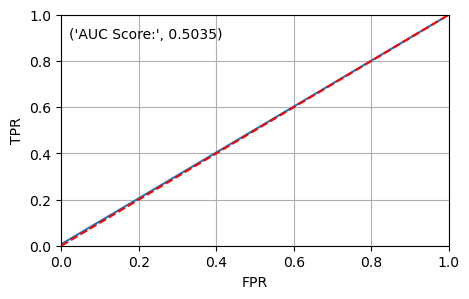

In [262]:
FPR,TPR,threshold=roc_curve(ytest,pred)
plt.plot(FPR,TPR)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],"r--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.text(x=0.02,y=0.9,s=("AUC Score:",round(metrics.roc_auc_score(ytest,pred),4)))
plt.grid(True)

In [3]:
from sklearn.neighbors import KNeighborsClassifier


In [4]:
KNN=KNeighborsClassifier()

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [266]:
dtree=DecisionTreeClassifier(criterion="entropy",max_depth=10,class_weight="balanced")

In [267]:
modeltree=dtree.fit(xtrain,ytrain)

In [268]:
pred=modeltree.predict(xtest)

In [269]:
from sklearn.metrics import recall_score,precision_score,confusion_matrix,f1_score

In [270]:
print("****************DECISION TREE CLASSIFIER********************************")

print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print("accuracy",accuracy_score(ytest,pred))
print("kappa score",cohen_kappa_score(ytest,pred))
print(classification_report(ytest,pred))


****************DECISION TREE CLASSIFIER********************************
recall score: 0.9703315881326352
precision score: 0.26898887276245764
[[159217   1511]
 [    17    556]]
f1 score: 0.4212121212121211
accuracy 0.9905270271108053
kappa score 0.41797449937510656
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    160728
           1       0.27      0.97      0.42       573

    accuracy                           0.99    161301
   macro avg       0.63      0.98      0.71    161301
weighted avg       1.00      0.99      0.99    161301



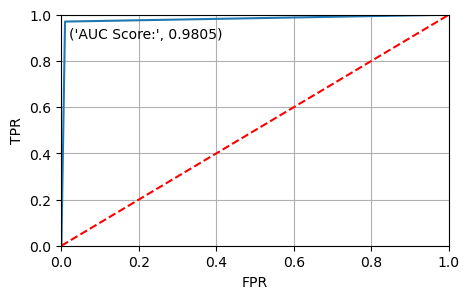

In [271]:
FPR,TPR,threshold=roc_curve(ytest,pred)
plt.plot(FPR,TPR)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],"r--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.text(x=0.02,y=0.9,s=("AUC Score:",round(metrics.roc_auc_score(ytest,pred),4)))
plt.grid(True)

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [273]:
rfc=RandomForestClassifier(n_estimators=400,max_depth=10,class_weight="balanced",random_state=10)
modelrfc=rfc.fit(xtrain,ytrain)



In [274]:
pred=modelrfc.predict(xtest)
print("****************Random Forest Classifier********************************")

print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print("accuracy",accuracy_score(ytest,pred))
print("kappa score",cohen_kappa_score(ytest,pred))
print(classification_report(ytest,pred))

****************Random Forest Classifier********************************
recall score: 0.9860383944153578
precision score: 0.25033229951262737
[[159036   1692]
 [     8    565]]
f1 score: 0.3992932862190812
accuracy 0.9894606977018121
kappa score 0.39587015955670546
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    160728
           1       0.25      0.99      0.40       573

    accuracy                           0.99    161301
   macro avg       0.63      0.99      0.70    161301
weighted avg       1.00      0.99      0.99    161301



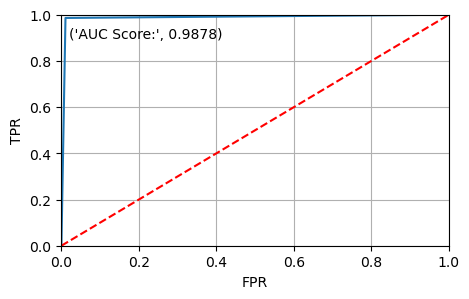

In [275]:
FPR,TPR,threshold=roc_curve(ytest,pred)
plt.plot(FPR,TPR)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],"r--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.text(x=0.02,y=0.9,s=("AUC Score:",round(metrics.roc_auc_score(ytest,pred),4)))
plt.grid(True)

In [208]:
#since the data was highly imabalance so we are focusing on high variance algorithm like
#dtree random forest and xgboost in order to focus on minorities

In [210]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [211]:
pred=xgb.predict(xtest)
print("****************XGBOOST********************************")

print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print("accuracy",accuracy_score(ytest,pred))
print("kappa score",cohen_kappa_score(ytest,pred))
print(classification_report(ytest,pred))

****************XGBOOST********************************
recall score: 0.7521815008726004
precision score: 0.8385214007782101
[[160645     83]
 [   142    431]]
f1 score: 0.7930082796688133
accuracy 0.9986050923428869
kappa score 0.7923105364937095
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    160728
           1       0.84      0.75      0.79       573

    accuracy                           1.00    161301
   macro avg       0.92      0.88      0.90    161301
weighted avg       1.00      1.00      1.00    161301



In [212]:
#we concluded that we are having f1 score better when we applied xgboost 
#reason being we need to study how xgboost works

In [213]:
# we will do hyperparameter tuning in the xgboost to get sound f1 score

In [277]:
from imblearn.over_sampling import SMOTE

In [278]:
smote=SMOTE()

In [279]:
bxtrain,bytrain=smote.fit_resample(xtrain,ytrain)

In [280]:
print("shape of balanced xtrain",bxtrain.shape)
print("shape of balanced ytrain",bytrain.shape)

shape of balanced xtrain (749954, 13)
shape of balanced ytrain (749954,)


In [281]:
bytrain.value_counts(normalize=True)

0   0.500000
1   0.500000
Name: TARGET, dtype: float64

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GradientBoostingClassifier()

In [282]:
rfc=RandomForestClassifier(n_estimators=400,max_depth=10,random_state=10,n_jobs=-1,class_weight="balanced")
modelrfc=rfc.fit(bxtrain,bytrain)
pred=modelrfc.predict(xtest)
print("****************Random Forest Classifier balanced********************************")

print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print("kappa score",cohen_kappa_score(ytest,pred))
print(classification_report(ytest,pred))
print("model accuracy",modelrfc.score(bxtrain,bytrain))

****************Random Forest Classifier balanced********************************
recall score: 0.9842931937172775
precision score: 0.25033288948069243
f1 score: 0.39915074309978776
[[159039   1689]
 [     9    564]]
kappa score 0.39572804153765306
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    160728
           1       0.25      0.98      0.40       573

    accuracy                           0.99    161301
   macro avg       0.63      0.99      0.70    161301
weighted avg       1.00      0.99      0.99    161301

model accuracy 0.9949703581819684


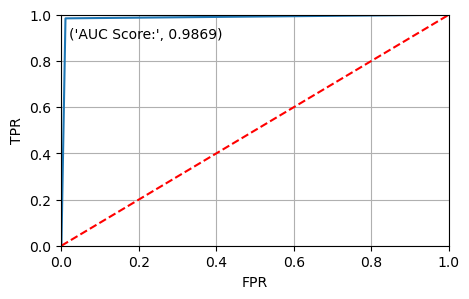

In [283]:
FPR,TPR,threshold=roc_curve(ytest,pred)
plt.plot(FPR,TPR)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],"r--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.text(x=0.02,y=0.9,s=("AUC Score:",round(metrics.roc_auc_score(ytest,pred),4)))
plt.grid(True)

In [285]:
print(FPR,TPR)

[0.         0.01050844 1.        ] [0.         0.98429319 1.        ]


In [286]:
score_card=pd.DataFrame(columns=["Probability Cutoff","AUC Score",
                     "Precision Score","Recall Score",
                     "Accuracy Score","Kappa Score",
                     "f1-Score"])

In [287]:
def update_score_card(model,cutoff):
    y_pred_prob=model.predict(xtest)
    
    y_pred=[0 if x<cutoff else 1 for x in y_pred_prob]
    global score_card
    score_card.append({"Probability Cutoff":cutoff,
                       "AUC Score":metrics.roc_auc_score(ytest,y_pred),
                       "Precision Score":metrics.precision_score(ytest,y_pred),
                       "Recall Score":metrics.recall_score(ytest,y_pred),
                       "Accuracy Score":metrics.accuracy_score(ytest,y_pred),
                       "Kappa Score":metrics.cohen_kappa_score(ytest,y_pred),
                       "f1-Score":metrics.f1_score(ytest,y_pred)},
                      ignore_index=True)

,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-Score


In [289]:
cutoff=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in cutoff:
    update_score_card(modelrfc,i)
    

In [290]:
#we will print the score card
score_card=score_card.sort_values("Probability Cutoff").reset_index(drop=True)

In [291]:
score_card.style.highlight_max(color="lightblue",
                               
                              subset=["AUC Score","Accuracy Score",
                                      
                                     "Kappa Score","f1-Score"])

ValueError: Length of values (0) does not match length of index (4)

In [292]:
youdenn_tables=pd.DataFrame({"TPR":TPR,
                            "FPR":FPR,
                            "threshold":threshold})

In [293]:
youdenn_tables["Difference"]=youdenn_tables.TPR - youdenn_tables.FPR

In [294]:
youdenn_tables=youdenn_tables.sort_values("Difference",ascending=False).reset_index(drop=True)

In [297]:
youdenn_tables

,TPR,FPR,threshold,Difference
0,0.984293,0.010508,1,0.973785
1,0.000000,0.000000,2,0.000000
2,1.000000,1.000000,0,0.000000


<AxesSubplot:>

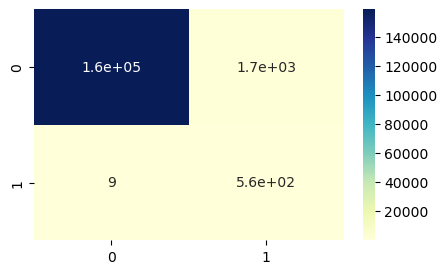

In [222]:
plt.rcParams["figure.figsize"]=[5,3]
sns.heatmap(confusion_matrix(ytest,pred),annot=True,cmap="YlGnBu")

In [56]:
features=pd.Series(modelrfc.feature_importances_,index=xtrain.columns).sort_values(ascending=False)

<AxesSubplot:>

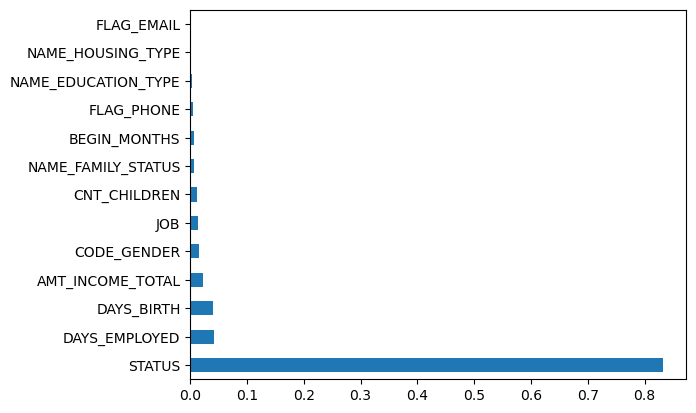

In [57]:
features.plot(kind="barh")

In [58]:
features.index

Index(['STATUS', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL',
       'CODE_GENDER', 'JOB', 'CNT_CHILDREN', 'NAME_FAMILY_STATUS',
       'BEGIN_MONTHS', 'FLAG_PHONE', 'NAME_EDUCATION_TYPE',
       'NAME_HOUSING_TYPE', 'FLAG_EMAIL'],
      dtype='object')

In [224]:
#we are taking only features that make strong impact to the target 
importantfaetures=X.drop(["FLAG_EMAIL","NAME_HOUSING_TYPE","FLAG_PHONE","NAME_EDUCATION_TYPE"],axis=1)

In [225]:
xtrain,xtest,ytrain,ytest=train_test_split(importantfaetures,y,test_size=0.30,random_state=1)

In [299]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
bxtrain,bytrain=os.fit_resample(xtrain,ytrain)

In [301]:
bytrain.value_counts()

0    374977
1    374977
Name: TARGET, dtype: int64

In [302]:
#using randomoversampler resulting in better recall so we are using it.
print("********************Randomoversampler 100% on Random Forest Classifier")
rfc=RandomForestClassifier(n_estimators=400,max_depth=10,random_state=1)
modelrfc=rfc.fit(bxtrain,bytrain)
pred=modelrfc.predict(xtest)
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print("kappa score",cohen_kappa_score(ytest,pred))
print(classification_report(ytest,pred))
print("model accuracy",modelrfc.score(bxtrain,bytrain))

********************Randomoversampler 100% on Random Forest Classifier
recall score: 0.9860383944153578
precision score: 0.2488986784140969
f1 score: 0.39746746394653537
[[159023   1705]
 [     8    565]]
kappa score 0.3940299241591889
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    160728
           1       0.25      0.99      0.40       573

    accuracy                           0.99    161301
   macro avg       0.62      0.99      0.70    161301
weighted avg       1.00      0.99      0.99    161301

model accuracy 0.9949223552377879


In [303]:
from sklearn.model_selection import RandomizedSearchCV

In [304]:
#creating grid
n_estimators=[100,200,300,400]
max_features=[10,11,12,14,15]
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,5,10]
max_depth=[3,5,7,10,15]
random_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400], 'max_features': [10, 11, 12, 14, 15], 'max_depth': [3, 5, 7, 10, 15], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 5, 10]}


In [305]:
xgb=XGBClassifier()

In [306]:
rf_random=RandomizedSearchCV(estimator=xgb,param_distributions=random_grid,scoring="f1",n_iter=5,cv=3,random_state=10,n_jobs=-1)

In [307]:
rf_random.fit(bxtrain,bytrain)

[17:57:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.



RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                

In [308]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 11,
 'max_depth': 10}

In [309]:
pred=rf_random.predict(xtest)

In [310]:
print("********************Hyperparametertuning on XGBOOST*************************")
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print("kappa score",cohen_kappa_score(ytest,pred))
print(classification_report(ytest,pred))
print("model accuracy",accuracy_score(ytest,pred))

********************Hyperparametertuning on XGBOOST*************************
recall score: 0.8656195462478184
precision score: 0.6946778711484594
f1 score: 0.7707847707847707
[[160510    218]
 [    77    496]]
kappa score 0.7698777319780068
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    160728
           1       0.69      0.87      0.77       573

    accuracy                           1.00    161301
   macro avg       0.85      0.93      0.88    161301
weighted avg       1.00      1.00      1.00    161301

model accuracy 0.9981711210717851


In [311]:
rf_random.best_score_

0.9991353661448094

#### taking time
from sklearn.model_selection import GridSearchCV, StratifiedKFold
param_grid={'n_estimators':range(100,200,2),
            'max_depth':range(3,8),
            'min_samples_split':range(2,10,2)}

cv=StratifiedKFold(n_splits=5,shuffle=False)
model=GridSearchCV(RandomForestClassifier(),param_grid,scoring="f1",n_jobs=-1,cv=cv)
model.fit(bxtrain,bytrain)
model.best_params_
model.best_score_
model=model.best_estimator_
pred=model.predict(xtest)
print("recall score",recall_score(ytest,pred))
print("precision score",precision_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print("f1_score",f1_score(ytest,pred))

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [89]:
from sklearn.naive_bayes import GaussianNB

In [90]:
#checking for best mdoel evaluation
def models_eval():
    models,names=[],[]
    models.append(LogisticRegression())
    names.append("lr")
    
    models.append(GaussianNB())
    names.append("nvb")
    
    models.append(KNeighborsClassifier())
    names.append("knn")
    
    models.append(DecisionTreeClassifier())
    names.append("dtree")
    
    models.append(RandomForestClassifier())
    names.append("rfc")
    
    models.append(AdaBoostClassifier())
    names.append("ada")
    
    models.append(GradientBoostingClassifier())
    names.append("gbc")
    
    models.append(XGBClassifier())
    names.append("xgb")
    
    return models,names

In [91]:
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import StratifiedKFold

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
def evaluation(X,y):
    models,names=models_eval()
    results=[]
    
    for i in range(len(models)):
        cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=5,random_state=10)
        scores=cross_val_score(models[i],X,y,scoring="f1",cv=cv)
        results.append(scores)
    
    plt.boxplot(results,labels=names,showmeans=True)

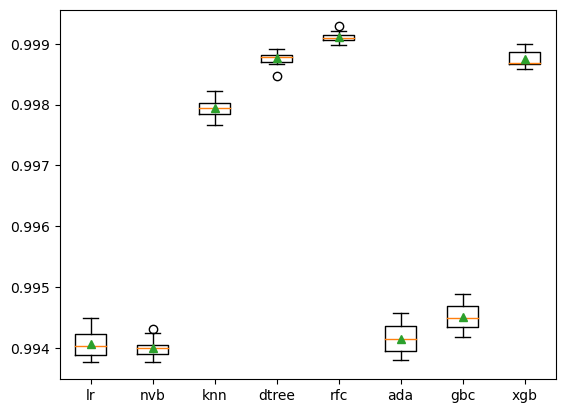

In [94]:
evaluation(bxtrain,bytrain)

In [101]:
bxtrain.columns

Index(['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'BEGIN_MONTHS',
       'CODE_GENDER', 'CNT_CHILDREN', 'NAME_FAMILY_STATUS', 'JOB', 'STATUS'],
      dtype='object')

In [102]:
# final model
#using random forest classifier hyperparamter tuning
n_estimators=[100,200,300,400,500]
max_features=[1,2,3,4,5,6,7,8,9]
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,5,10,15,20]
max_depth=[3,5,7,10,15,20,25,30]
random_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_depth': [3, 5, 7, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 5, 10, 15, 20]}


In [103]:
rfc=RandomForestClassifier()
rf_random=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,scoring="f1",n_iter=5,cv=3,random_state=10)
rf_random.fit(bxtrain,bytrain)

In [106]:
print("best params",rf_random.best_params_)
print("accuracy",rf_random.best_score_)

{'n_estimators': 300,
 'min_samples_split': 20,
 'min_samples_leaf': 5,
 'max_features': 9,
 'max_depth': 25}

0.9981788968152164

In [107]:
pred=rf_random.predict(xtest)

In [108]:
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print(confusion_matrix(ytest,pred))

recall score: 0.8725099601593626
precision score: 0.5296251511487303
f1 score: 0.6591422121896162
[[129518    389]
 [    64    438]]


In [312]:
#passing same parameters in xgboost
n_estimators=[100,200,300,400,500]
max_features=[1,2,3,4,5,6,7,8,9]
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,5,10,15,20]
max_depth=[3,5,7,10,15,20,25,30]
random_grid={"n_estimators":n_estimators,
            "max_features":max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_depth': [3, 5, 7, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 5, 10, 15, 20]}


In [313]:
xgb=XGBClassifier()
rf_random=RandomizedSearchCV(estimator=xgb,param_distributions=random_grid,scoring="f1",n_iter=5,cv=3,random_state=10)
rf_random.fit(bxtrain,bytrain)

[17:58:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:59:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[17:59:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[18:00:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

[18:03:57] WARNING: C:/build

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

In [314]:
pred=rf_random.predict(xtest)

In [315]:
print("********************Hyperparametertuning on XGBOOST*************************")
print("recall score:",recall_score(ytest,pred))
print("precision score:",precision_score(ytest,pred))
print("f1 score:",f1_score(ytest,pred))
print(confusion_matrix(ytest,pred))
print("kappa score",cohen_kappa_score(ytest,pred))
print(classification_report(ytest,pred))
print("model accuracy",accuracy_score(ytest,pred))

********************Hyperparametertuning on XGBOOST*************************
recall score: 0.8429319371727748
precision score: 0.7241379310344828
f1 score: 0.7790322580645161
[[160544    184]
 [    90    483]]
kappa score 0.7781845555170007
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    160728
           1       0.72      0.84      0.78       573

    accuracy                           1.00    161301
   macro avg       0.86      0.92      0.89    161301
weighted avg       1.00      1.00      1.00    161301

model accuracy 0.9983013124531156


In [316]:
print("best params",rf_random.best_params_)
print("accuracy",rf_random.best_score_)

best params {'n_estimators': 300, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 9, 'max_depth': 25}
accuracy 0.9992804761631585


In [317]:
rf_random.score

<bound method BaseSearchCV.score of RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constra

In [338]:
from sklearn.metrics import roc_auc_score,roc_curve

In [339]:
def roc(actual,pred_prob):
    fpr,tpr,thres  = roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],ls='--',color='b')
    plt.xlabel('FPR AUC: %.2f'%roc_auc_score(actual,pred_prob))
    plt.ylabel("TPR")
    plt.show()

In [343]:
def scores (actual,predicted):
    print('Confusion Metrics :\n',confusion_matrix(actual,predicted))
    print('Accuracy :',accuracy_score(actual,predicted))
    print('Recall :',recall_score(actual,predicted))
    print('Precision :',precision_score(actual,predicted))
    print('F1 Score :',f1_score(actual,predicted))
    print('Cohen Kappa Score :', cohen_kappa_score(actual,predicted))
    print('Classification Summary :',classification_report(actual,predicted))

In [345]:
scores(ytest,pred)

Confusion Metrics :
 [[160544    184]
 [    90    483]]
Accuracy : 0.9983013124531156
Recall : 0.8429319371727748
Precision : 0.7241379310344828
F1 Score : 0.7790322580645161
Cohen Kappa Score : 0.7781845555170007
Classification Summary :               precision    recall  f1-score   support

           0       1.00      1.00      1.00    160728
           1       0.72      0.84      0.78       573

    accuracy                           1.00    161301
   macro avg       0.86      0.92      0.89    161301
weighted avg       1.00      1.00      1.00    161301



In [347]:
pred_prob=rf_random.predict_proba(xtest)[:,1]

In [349]:
pred_prob

array([2.2452939e-06, 4.4729109e-06, 5.6246968e-06, ..., 3.7552084e-07,
       1.3593504e-07, 1.9282015e-07], dtype=float32)

In [358]:
ytest.shape,xtest.shape

((161301,), (161301, 13))

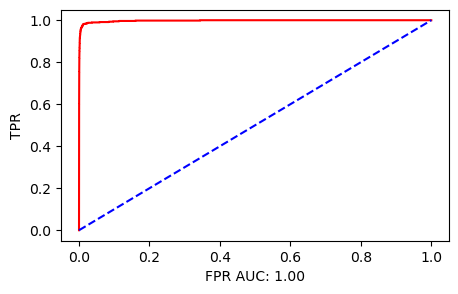

In [348]:
roc(ytest,pred_prob)

In [350]:
pred_tree_prob=dtree.predict_proba(xtest)[:,1]

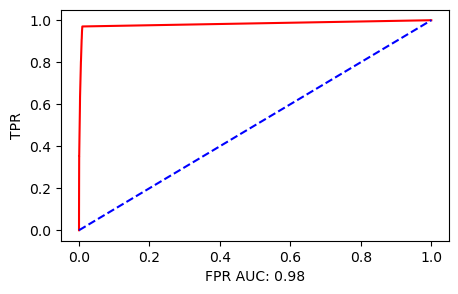

In [351]:
roc(ytest,pred_tree_prob)

In [ ]:
pred_lr_prob=mod

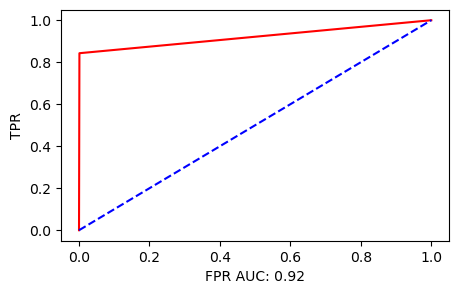

In [346]:
roc(ytest,pred)

In [352]:
# For check FPR & TPR We use Youden Index 
fpr,tpr,thres = roc_curve(ytest,pred_prob)

In [353]:
data_thres = pd.DataFrame({'FPR':fpr,'TPR':tpr,'THRES':thres,'Youden Index':(tpr-fpr)})

In [354]:
data_thres.head()

,FPR,TPR,THRES,Youden Index
0,0.000000,0.000000,2.000000,0.000000
1,0.000000,0.003490,1.000000,0.003490
2,0.000000,0.024433,1.000000,0.024433
3,0.000000,0.043630,1.000000,0.043630
4,0.000000,0.064572,1.000000,0.064572


In [355]:
data_thres.sort_values(by='Youden Index',ascending = False).head()

,FPR,TPR,THRES,Youden Index
714,0.013657,0.982548,0.000035,0.968891
715,0.013663,0.982548,0.000035,0.968885
716,0.013688,0.982548,0.000035,0.968860
647,0.011946,0.980803,0.000048,0.968857
648,0.011958,0.980803,0.000048,0.968845


In [377]:
final_pred = np.where(pred_prob >0.05 , 1, 0)

In [378]:
print("********************Hyperparametertuning on XGBOOST*************************")
print("recall score:",recall_score(ytest,final_pred))
print("precision score:",precision_score(ytest,final_pred))
print("f1 score:",f1_score(ytest,final_pred))
print(confusion_matrix(ytest,final_pred))
print("kappa score",cohen_kappa_score(ytest,final_pred))
print(classification_report(ytest,final_pred))
print("model accuracy",accuracy_score(ytest,final_pred))

********************Hyperparametertuning on XGBOOST*************************
recall score: 0.9057591623036649
precision score: 0.6134751773049646
f1 score: 0.7315010570824524
[[160401    327]
 [    54    519]]
kappa score 0.730358911149619
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    160728
           1       0.61      0.91      0.73       573

    accuracy                           1.00    161301
   macro avg       0.81      0.95      0.87    161301
weighted avg       1.00      1.00      1.00    161301

model accuracy 0.9976379563672885
